In [17]:
# 超参数
VAULE_X = 'high'
VAULE_Y = 'amount'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性

import pandas as pd

# 读取excel文件并获取指定列
# df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'code_week','holidays', '305_price', '305_amount','305_refuelLiters', '313_price', '313_amount','313_refuelLiters' ], encoding='GBK')
print(df)


           date  order_cnt       amount text_day text_night  high  low wc_day  \
0      2023-1-1     902538  268544969.5        阴          阴     8    5    <3级   
1      2023-1-2    1066437  323796828.3        阴         多云     9    0    <3级   
2      2023-1-3    1216502  386938985.1       多云         多云     9    0    <3级   
3      2023-1-4     874633  271284119.0       多云         多云    12    3   3~4级   
4      2023-1-5     901227  283022796.0       多云         多云    13    2    <3级   
..          ...        ...          ...      ...        ...   ...  ...    ...   
359  2023-12-26    1072045  335929197.6        阴         多云     9    0   3~4级   
360  2023-12-27    1054896  332618128.4       多云          晴    12    0    <3级   
361  2023-12-28    1032115  323028612.7        晴         多云    12    3   3~4级   
362  2023-12-29    1218840  372592734.2       多云         小雨    12    5   3~4级   
363  2023-12-30    1126207  341635923.3        阴          晴    14    1    <3级   

    wd_day wc_night wd_nigh

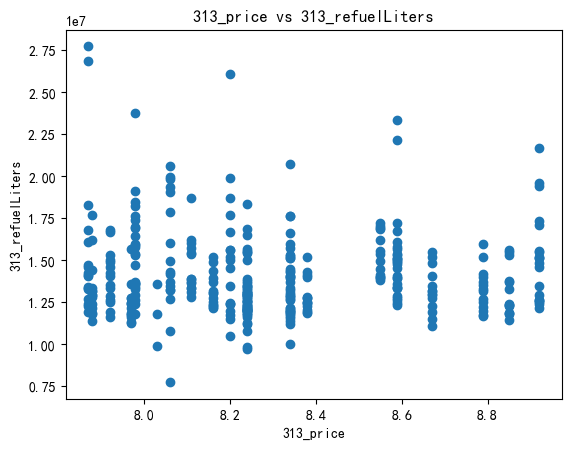

In [18]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()

In [19]:
# 计算相关系数
corr = df[VAULE_X].corr(df[VAULE_Y])
print(corr)
# 判断线性关系强度
if corr > SIGN_LINER:
    print("具有强正向线性关系, 显著性为", corr)
elif corr < -SIGN_LINER:
    print("具有强负向线性关系, 显著性为", corr)
else:
    print("线性关系强度不足, 显著性为", corr)

-0.023746599970250973
线性关系强度不足, 显著性为 -0.023746599970250973


In [20]:
# 拟合出 两者相关性的线性 函数

# 使用最小二乘法拟合数据
column_x = df[VAULE_X]
column_y = df[VAULE_Y]
import numpy as np
coefficients = np.polyfit(column_x, column_y, 1)

# 提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

# 打印拟合出的线性函数的参数
print("斜率:", slope)
print("截距:", intercept)

斜率: -192104.7475965219
截距: 15652556.761766454
